In [14]:
from qiskit import __version__

print(__version__)

1.3.3


In [15]:
import numpy as np

x = np.random.randint(0,2)
print(x)


1


8


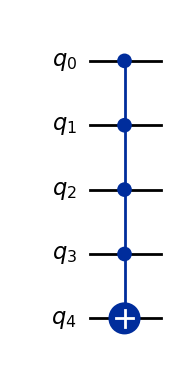

In [16]:
from qiskit import QuantumCircuit

num_qubits = 4
print(2**num_qubits // 2)
qc = QuantumCircuit(num_qubits+1)

if np.random.randint(0,2):
    # # Flip output qubit with 50% chance
    qc.x(num_qubits)
# if np.random.randint(0,2):
#     # return constant circuit with 50% chance
#     return qc

# multi-controlled NOT gate or Toffoli gate for multiple controls
qc.mcx(list(range(num_qubits)), num_qubits)
display(qc.draw('mpl'))


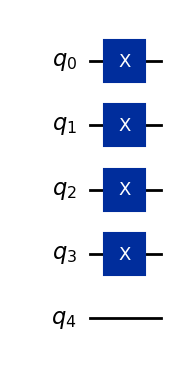

In [17]:
qc = QuantumCircuit(num_qubits+1)
qc.x(range(num_qubits))
display(qc.draw('mpl'))

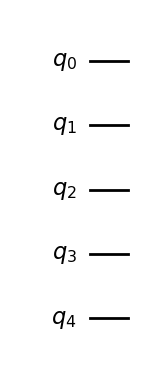

In [18]:
qc = QuantumCircuit(num_qubits+1)
display(qc.draw('mpl'))

In [38]:
# A Simple example of Deutsh-Jozsa Oracle function 
# f(x) = 0 or f(x) = 1 (constant) with 50% and 
# f(x) = x_1 xor x_2 alo called multi-controlled NOT gate or Toffoli gate for multiple controls (balanced) with 50%

def deutsch_jozsa_function(num_qubits: int):
    f = QuantumCircuit(num_qubits+1)

    if np.random.randint(0, 2):
        if np.random.randint(0, 2):
            f.x(range(num_qubits))
        else:
            return f
    else:
        #for i in range(num_qubits):
        #    f.cx(i, num_qubits)
        f.mcx(list(range(num_qubits)), num_qubits)
    return f

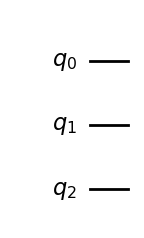

In [39]:
# Deutsch-Jozsa function for f(x) = 0 or 1 or x_1 xor x_2
display(deutsch_jozsa_function(2).draw('mpl'))

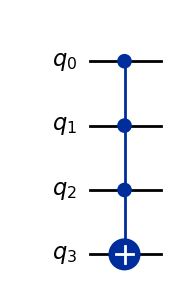

In [40]:
# Deutsch-Jozsa function for f(x) = 0 or 1 or x_1 xor x_2
display(deutsch_jozsa_function(3).draw('mpl'))

In [41]:
def compile_circuit(f: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = f.num_qubits - 1
    qc = QuantumCircuit(n+1, n)

    # Step 1 (Rotate): Initialize the output qubit in |1> and apply Hadamard gates
    qc.x(n)
    qc.h(range(n+1))
    qc.barrier()
    
    # Step 2 (compute): Oracle for f(x1, x2) = x1 ⊕ x2 ....
    qc.compose(f, inplace=True)
    qc.barrier()
    
    # Step 3: Apply Hadamard to first n qubits
    qc.h(range(n))
    
    # Step 4: Measure the first n qubits
    qc.measure(range(n), range(n))

    return qc
    

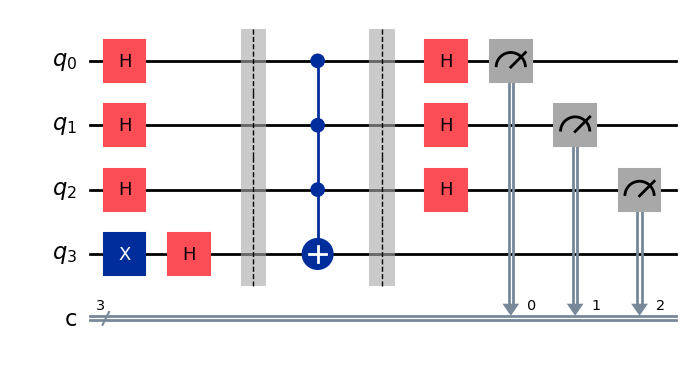

In [42]:
display(compile_circuit(deutsch_jozsa_function(3)).draw("mpl"))